In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df=pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
3,1521,3,75.0
7,3300,4,155.0
13,1100,2,40.0
9,3700,5,167.0
18,2770,3,102.0


In [17]:
from sklearn import preprocessing

sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [18]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    no_of_features=X.shape[1]
    w=np.ones(shape=(no_of_features))
    b=0
    cost_list=[]
    epoch_list=[]
    total_samples=X.shape[0]
    for i in range(epochs):
        y_predicted=np.dot(w,X.T)+b

        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(y_true-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)    
    return w,b,cost,cost_list,epoch_list


w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

w,b,cost



(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

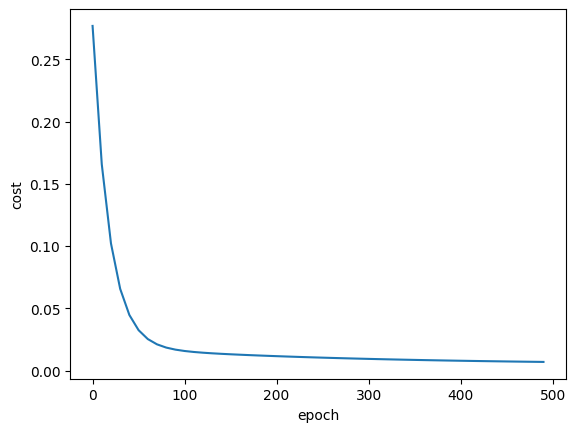

In [19]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [20]:
sx.transform([[10,200]])[0]

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([-0.27241379, 49.75      ])

In [21]:
def predict(area,bedroom,w,b):
    scaled_X=sx.transform([[area,bedroom]])[0]
    scaled_price=scaled_X[0]*w[0]+scaled_X[1]*w[1]+b
    return sy.inverse_transform([[scaled_price]])


predict(2400,4,w,b)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[121.87126977]])

In [34]:
import random
def stochastric_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    no_of_features=X.shape[1]
    w=np.ones(shape=(no_of_features))
    b=0
    cost_list=[]
    epoch_list=[]
    total_samples=X.shape[0]
    for i in range(epochs):
        random_indx=random.randint(0,total_samples- 1)
        sample_X=X[random_indx]
        sample_Y=y_true[random_indx]
        y_predicted=np.dot(w,sample_X.T)+b

        w_grad=-(2/total_samples)*(sample_X.T.dot(sample_Y-y_predicted))
        b_grad=-(2/total_samples)*np.sum(sample_Y-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.square(sample_Y-y_predicted)

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastric_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.71054164, 0.67682776]), -0.23135047160530842, 0.011023337018738748)

In [35]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [36]:
predict(2400,4,w,b)


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[121.87126977]])

In [37]:
predict(2400,4,w_sgd,b_sgd)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[122.21959845]])

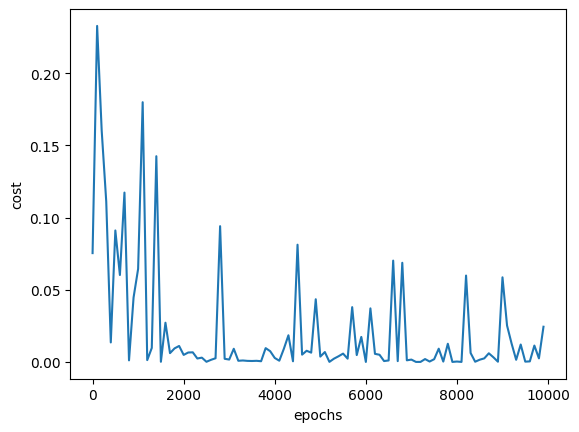

In [38]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [51]:
def mini_batch_gradient_descent(X,y_true,epochs,batch_size=5,learning_rate=0.01):
    no_of_features=X.shape[1]
    w=np.ones(shape=(no_of_features))
    b=0
    total_samples=X.shape[0]
     
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
    
    cost_list_mbgd=[]
    epoch_list_mbgd=[]
    num_batches = int(total_samples/batch_size)
    for i in range(epochs):
        random_indcs=np.random.permutation(total_samples)
        xTemp=X[random_indcs]
        yTemp=y_true[random_indcs]
        for j in range(0,total_samples,batch_size):
            xj=xTemp[j:j+batch_size]
            yj=yTemp[j:j+batch_size]
            y_predicted=np.dot(w,xj.T)+b

            w_grad=-(2/len(xj))*(xj.T.dot(yj-y_predicted))
            b_grad=-(2/len(xj))*np.sum(yj-y_predicted)

            w=w-learning_rate*w_grad
            b=b-learning_rate*b_grad

            cost=np.mean(np.square(yj-y_predicted))

        if i%10==0:
            cost_list_mbgd.append(cost)
            epoch_list_mbgd.append(i)

    return w,b,cost,cost_list_mbgd,epoch_list_mbgd

w_mbgd,b_mbgd,cost_mbgd,cost_list_mbgd,epoch_list_mbgd=mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),120)
w_mbgd,b_mbgd,cost_mbgd



(array([0.70998945, 0.67819742]), -0.23332892071403033, 0.004620427461197033)

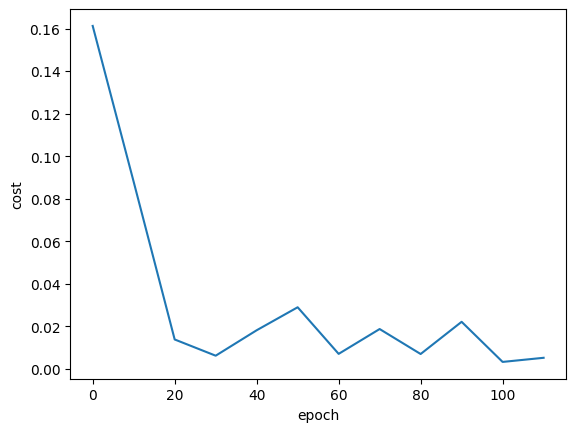

In [56]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd,cost_list_mbgd)

In [52]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [53]:
predict(2400,4,w_sgd,b_sgd)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[122.21959845]])

In [54]:
predict(2400,4,w_mbgd,b_mbgd)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[122.05005729]])

In [55]:
predict(2400,4,w,b)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[121.87126977]])